<a href="https://colab.research.google.com/github/Maliha-Haroon/BigData-course/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set(style="whitegrid")
%matplotlib inline


In [4]:
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Probability of heart disease
p_disease = df['target'].mean()
print("Probability of Heart Disease:", round(p_disease, 3))

# Probability by gender
df['sex_label'] = df['sex'].map({0:'Female', 1:'Male'})
gender_prob = df.groupby('sex_label')['target'].mean()
gender_prob


Probability of Heart Disease: 0.513


,target
sex_label,
Female,0.724359
Male,0.420757


In [8]:
# Probability of heart disease when Age > 50
prob_age_50 = df[df['age'] > 50]['target'].mean()
print("P(Heart Disease | Age > 50):", round(prob_age_50, 3))


P(Heart Disease | Age > 50): 0.444


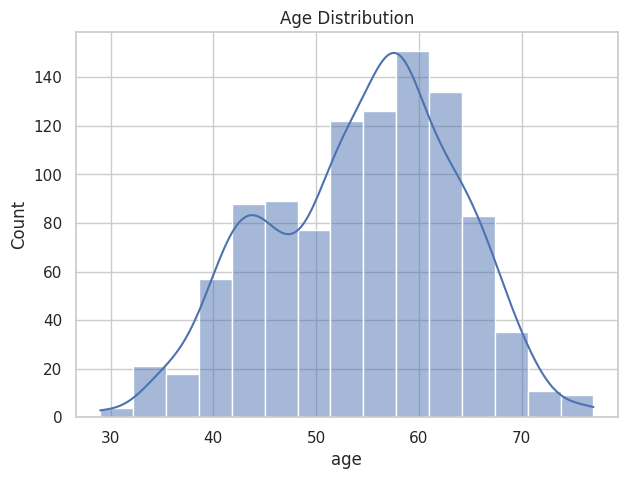

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(df['age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()


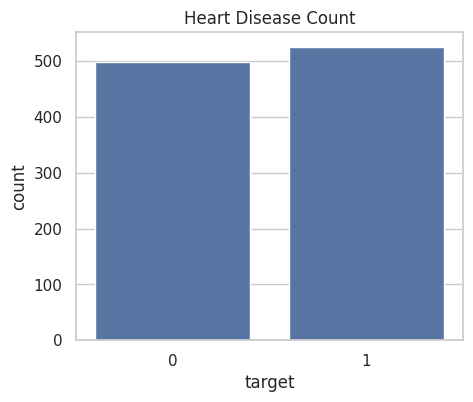

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Count")
plt.show()


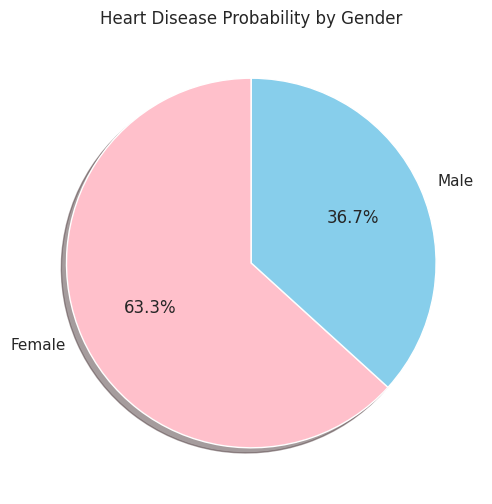

In [12]:
gender_ratio = df.groupby('sex_label')['target'].mean()
colors = ['pink', 'skyblue']

plt.figure(figsize=(6,6))
plt.pie(gender_ratio, labels=gender_ratio.index, autopct='%1.1f%%',
        startangle=90, colors=colors, shadow=True)
plt.title('Heart Disease Probability by Gender')
plt.show()


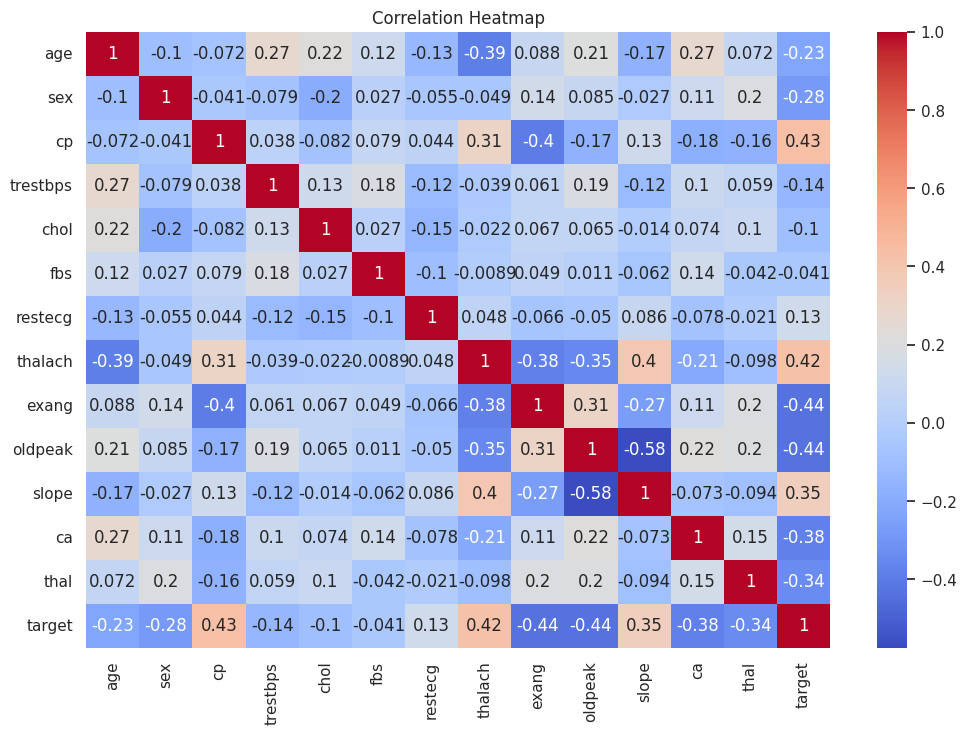

In [14]:
# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
X = df.drop(['target', 'sex_label'], axis=1)
y = df['target']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
y_pred = model.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy*100, 2), "%")


Model Accuracy: 98.54 %


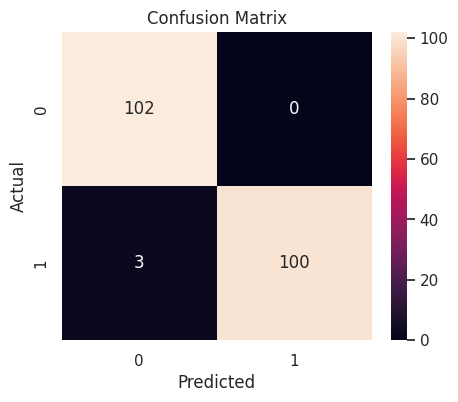

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
X_cluster = df[['age', 'thalach']]

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)


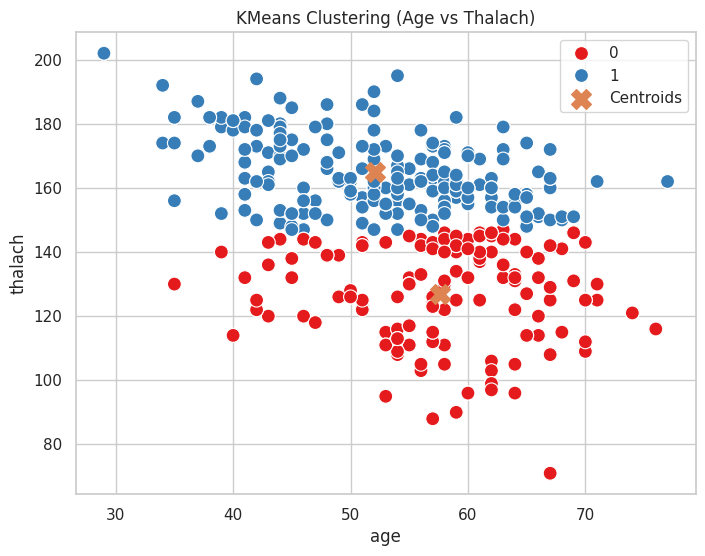

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='thalach', hue='Cluster', palette='Set1', s=100)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, marker='X', label='Centroids')

plt.title("KMeans Clustering (Age vs Thalach)")
plt.legend()
plt.show()


In [26]:
gender_ratio = df.groupby('sex_label')['target'].mean()


In [27]:
df.groupby('sex_label')['target'].mean()


,target
sex_label,
Female,0.724359
Male,0.420757


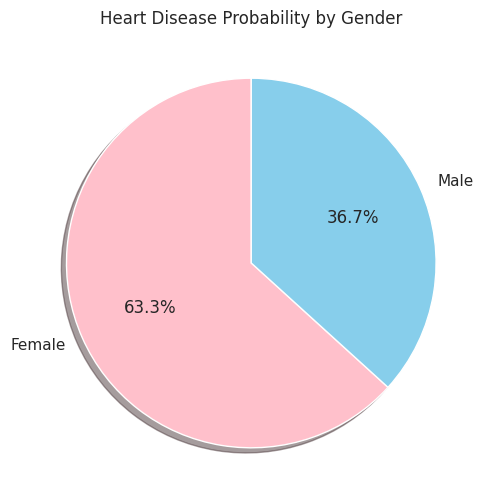

In [29]:
import matplotlib.pyplot as plt

# Heart disease probability by gender
gender_ratio = {'Female': 0.724359, 'Male': 0.420757}

# Custom colors
colors = ['pink', 'skyblue']

plt.figure(figsize=(6,6))
plt.pie(
    gender_ratio.values(),
    labels=gender_ratio.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True
)

plt.title('Heart Disease Probability by Gender')
plt.show()


# **Heart Disease Analysis by Gender**

**Objective:** Examine heart disease probability by gender.

**Findings:**

**Female:** 72.4%

**Male:** 42.1%

**Insight:** Females show a significantly higher probability of heart disease compared to males.

**Conclusion:** Preventive measures and awareness should prioritize female patients, given their higher risk.